In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.graph_objects as go
import pickle

MA_AP_all_data = pd.read_excel('data/MA_AP_performance/AP_data_combined_18_22.xlsx', sheet_name='2022-23')

# 2022-23: AP Score 3-5 vs. Median Household Income

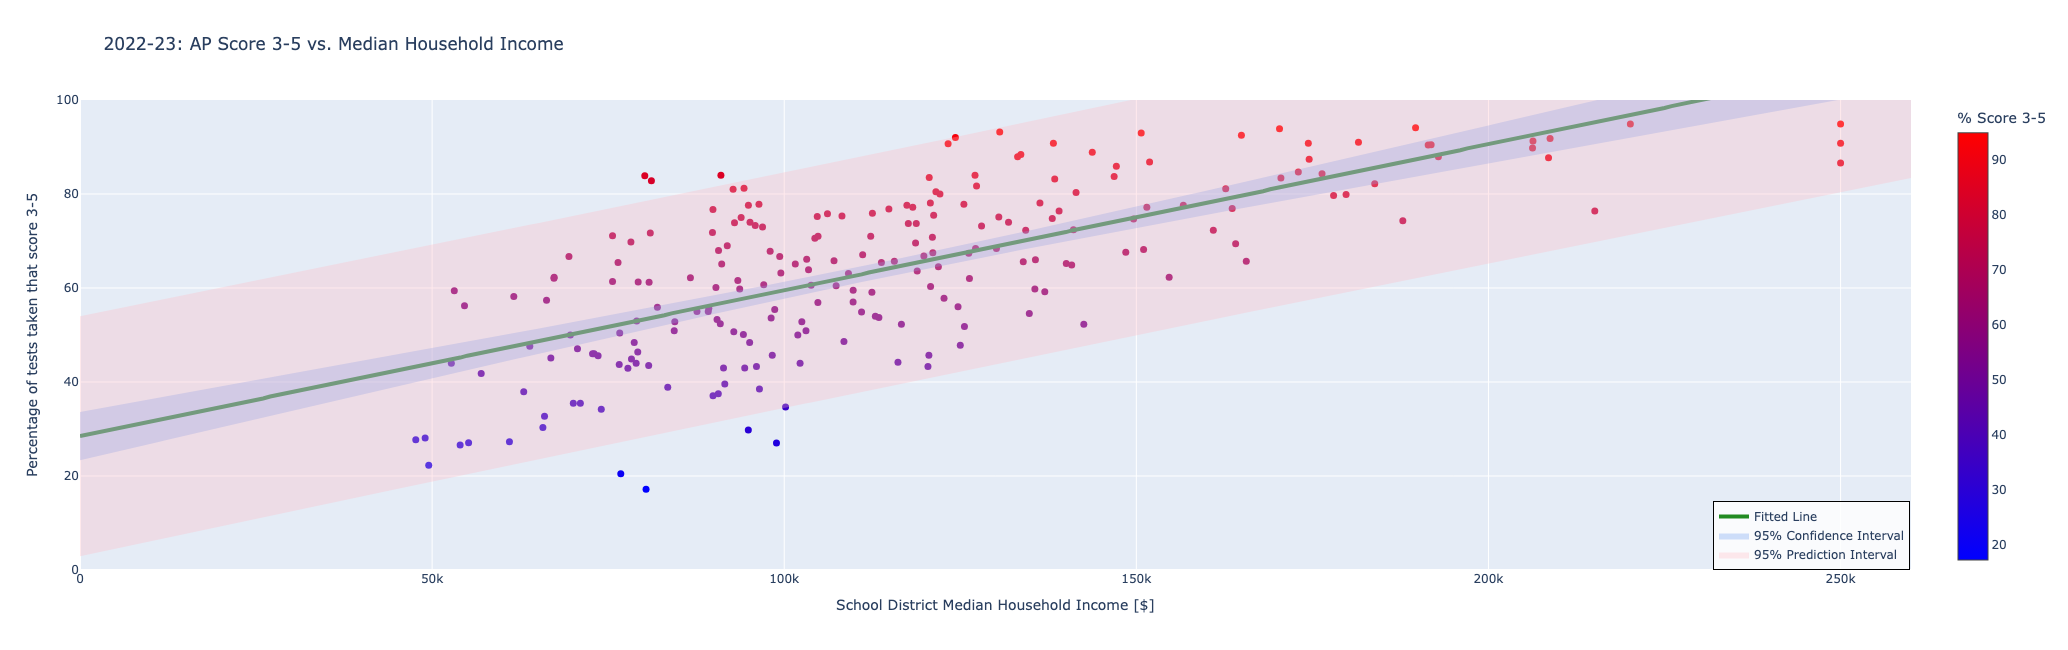

In [47]:
x_arr = MA_AP_all_data['Median Household Income'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 260e3, 261)
x_line_rounded = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line_rounded)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)


#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['District Name'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line_rounded,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Median Household Income',
    xaxis_title='School District Median Household Income [$]',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 260e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/MA_pickled/MA_pass_vs_school_district_income.pkl', 'wb') as f:
    pickle.dump(fig, f)

# 2022-23: AP Score 3-5 vs. District Population

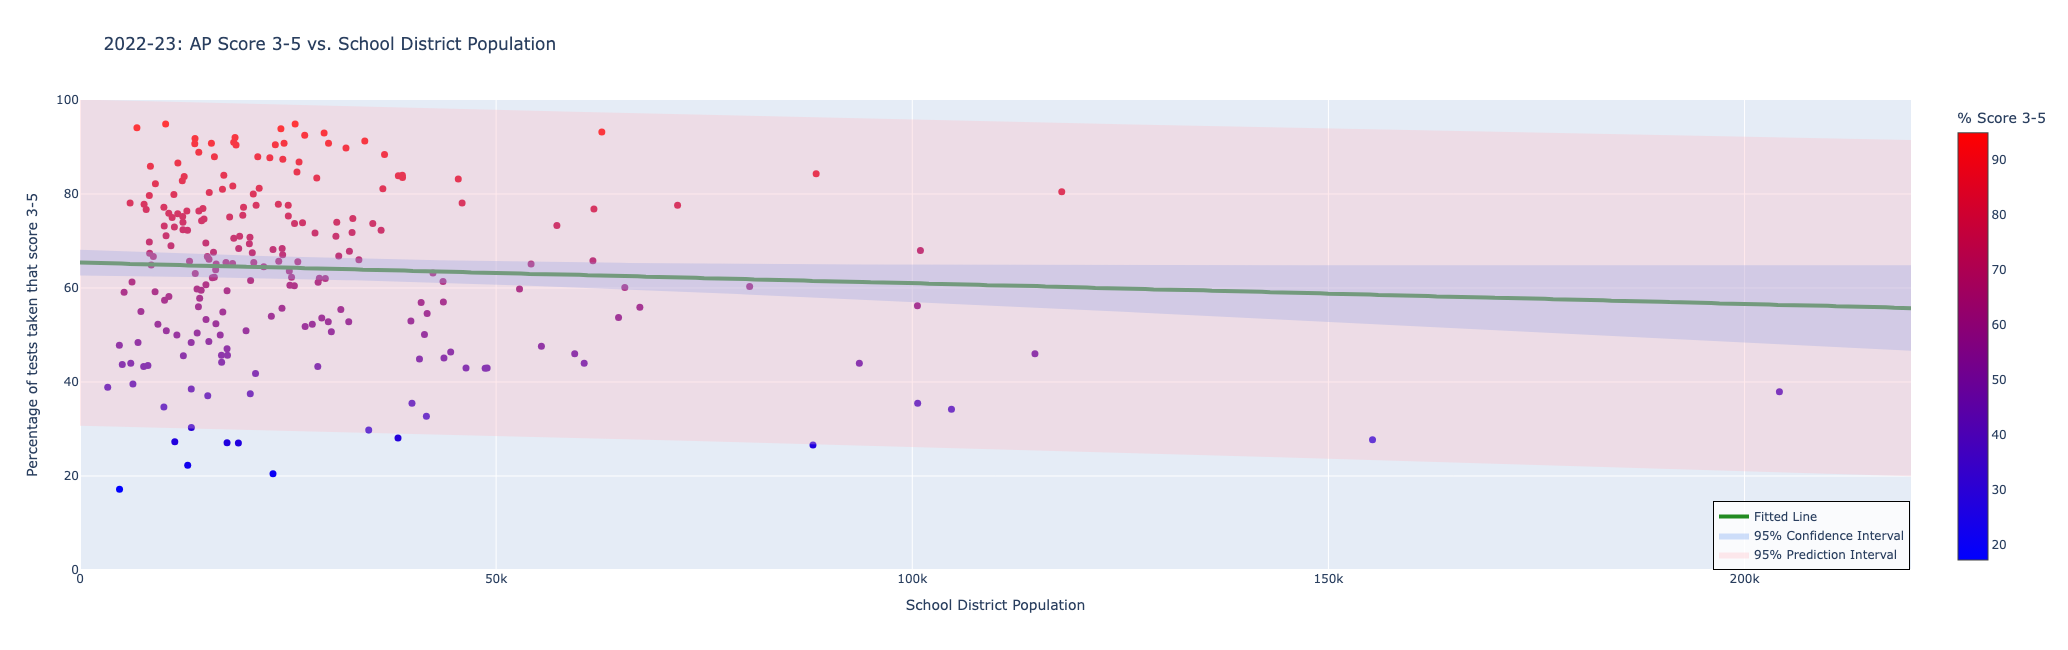

In [51]:
x_arr = MA_AP_all_data['Population'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 220e3, 221)
x_line = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['District Name'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. School District Population',
    xaxis_title='School District Population',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 220e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/MA_pickled/MA_pass_vs_school_district_population.pkl', 'wb') as f:
    pickle.dump(fig, f)

# 2022-23: AP Score 3-5 vs. Per pupil expenditure

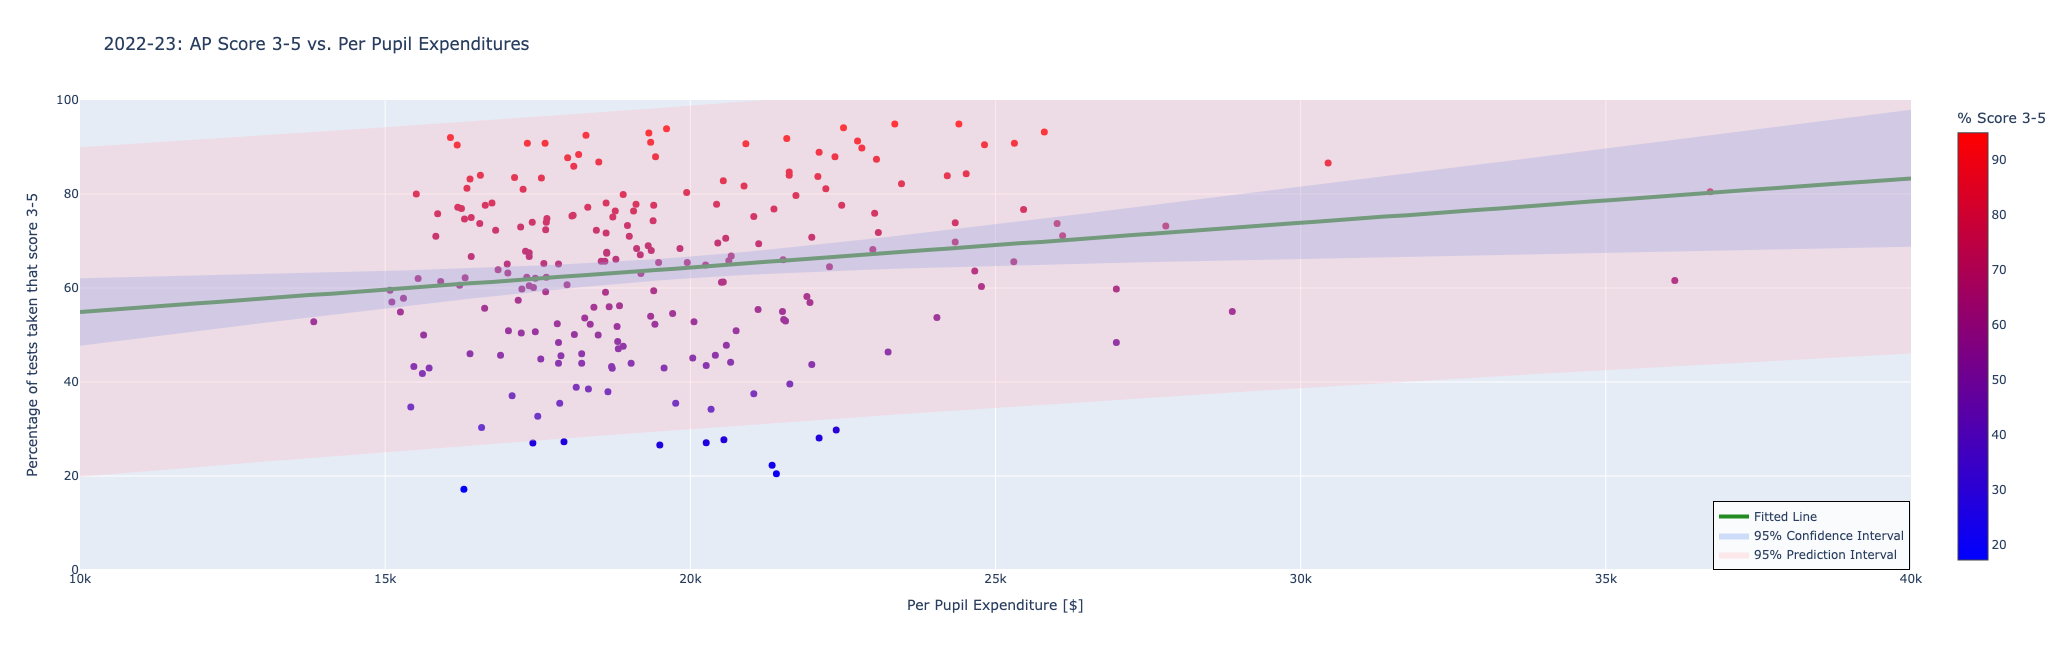

In [50]:
x_arr = MA_AP_all_data['Total Expenditures per Pupil'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(10e3, 40e3, 81)
x_line = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['District Name'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Per Pupil Expenditures',
    xaxis_title='Per Pupil Expenditure [$]',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[10e3, 40e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/MA_pickled/MA_pass_vs_per_pupil_expenditures.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Inverse Distance Quantities

### 2022-23: AP Score 3-5 vs. Inverse Distance to R1/R2 Universities

In [5]:
x_arr = MA_AP_all_data['Inverse Distance R1R2'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = 2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(2, 10, 25)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. R1/R2 Universities within 10 miles',
                  xaxis_title='Effective number of R1/R2 Universities within 10 miles',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[2, 10])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_R1R2_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Inverse Distance to Public Universities

In [6]:
x_arr = MA_AP_all_data['Inverse Distance Public'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = 2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(8, 22, 100)
x_line = np.round(x_line, decimals = 2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Public Universities within 10 miles',
                  xaxis_title='Effective number of Public Universities within 10 miles',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[8, 22])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_public_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Inverse Distance to Private not-for-profit Universities

In [7]:
x_arr = MA_AP_all_data['Inverse Distance Private nfp'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = 2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(15, 65, 100)
x_line = np.round(x_line, decimals = 2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Private Universities within 10 miles',
                  xaxis_title='Effective number of Private Universities within 10 miles',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[15, 65])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_private_nfp_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Inverse Distance to Land Grant Universities

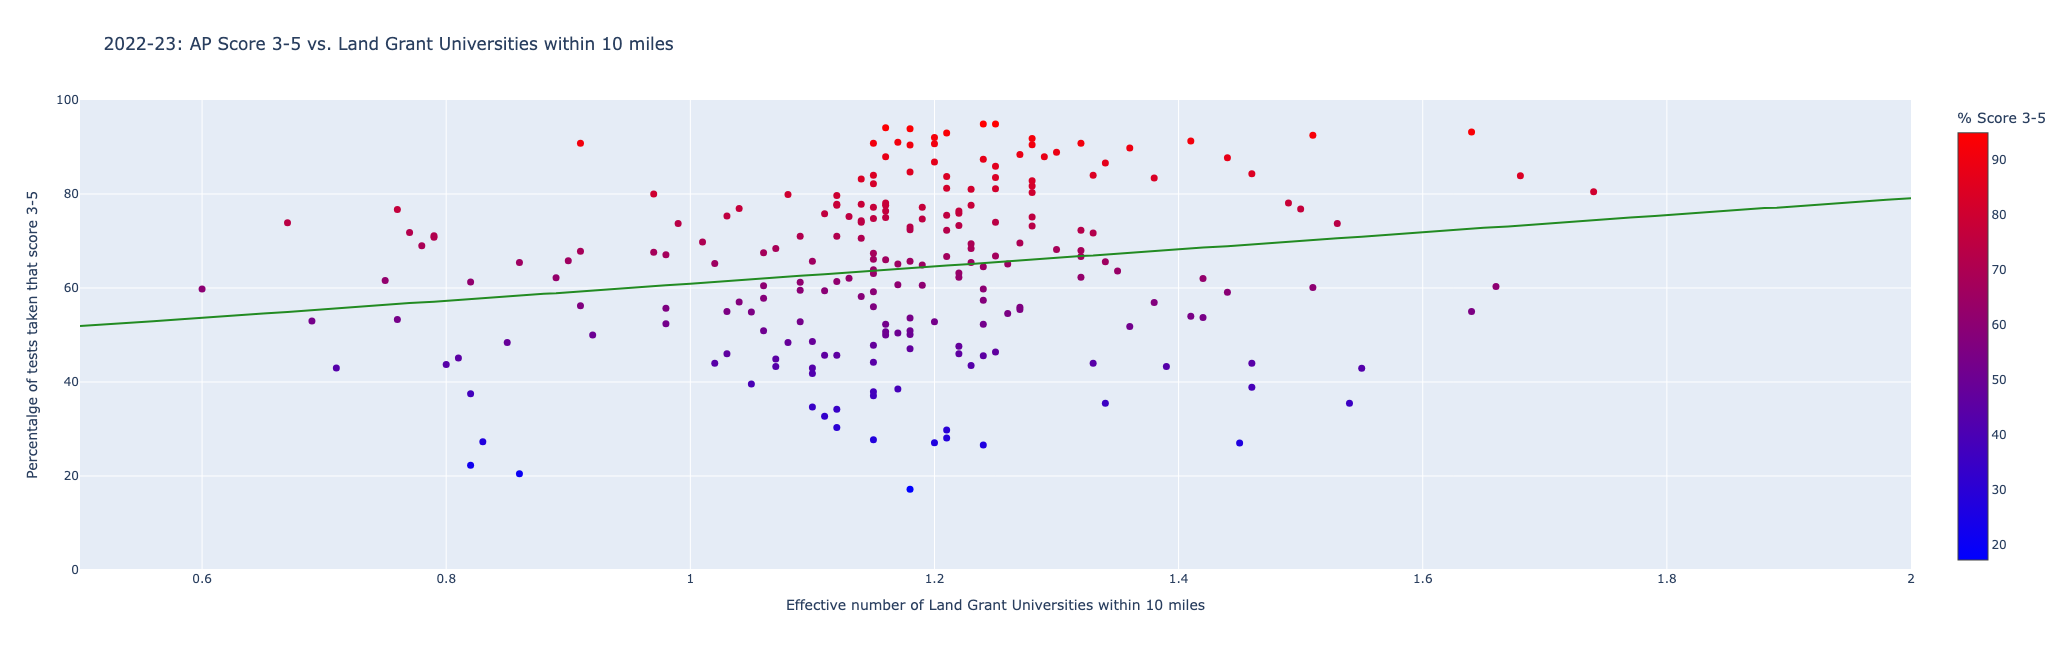

In [8]:
x_arr = MA_AP_all_data['Inverse Distance Land Grant'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = 2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0.5, 2, 100)
x_line = np.round(x_line, decimals = 2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Land Grant Universities within 10 miles',
                  xaxis_title='Effective number of Land Grant Universities within 10 miles',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0.5, 2])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_land_grant_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Inverse Distance to STEM Universities

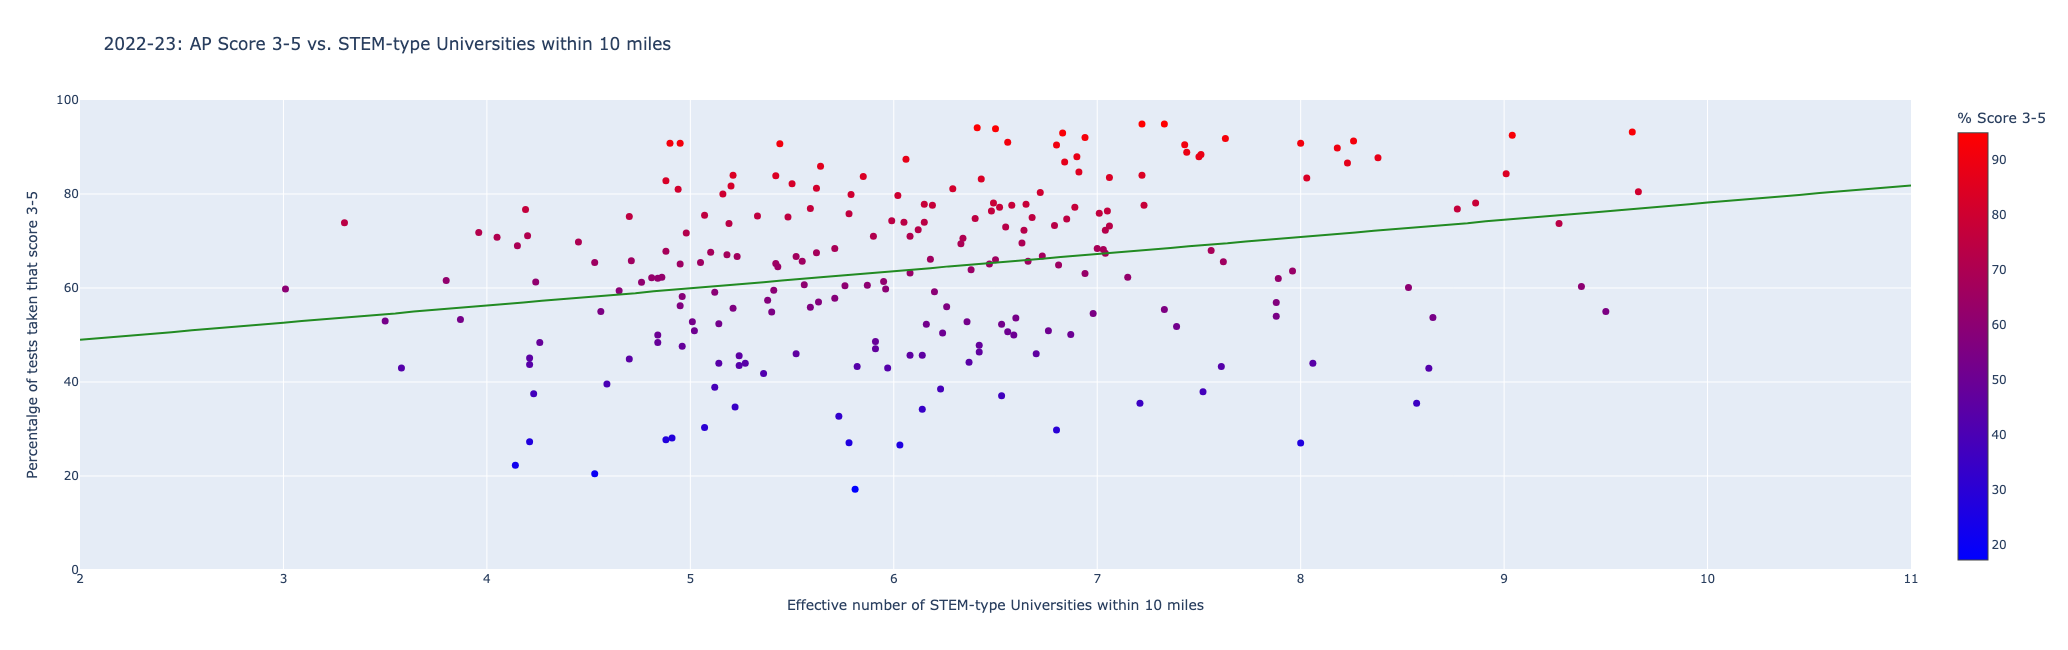

In [9]:
x_arr = MA_AP_all_data['Inverse Distance STEM'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = 2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(2, 11, 100)
x_line = np.round(x_line, decimals = 2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. STEM-type Universities within 10 miles',
                  xaxis_title='Effective number of STEM-type Universities within 10 miles',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[2, 11])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_STEM_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Number of Annual Enrollment $\times$ Inverse Distance = Effective Number of Annual Enrollment within 10 miles

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to R1/R2 Universities

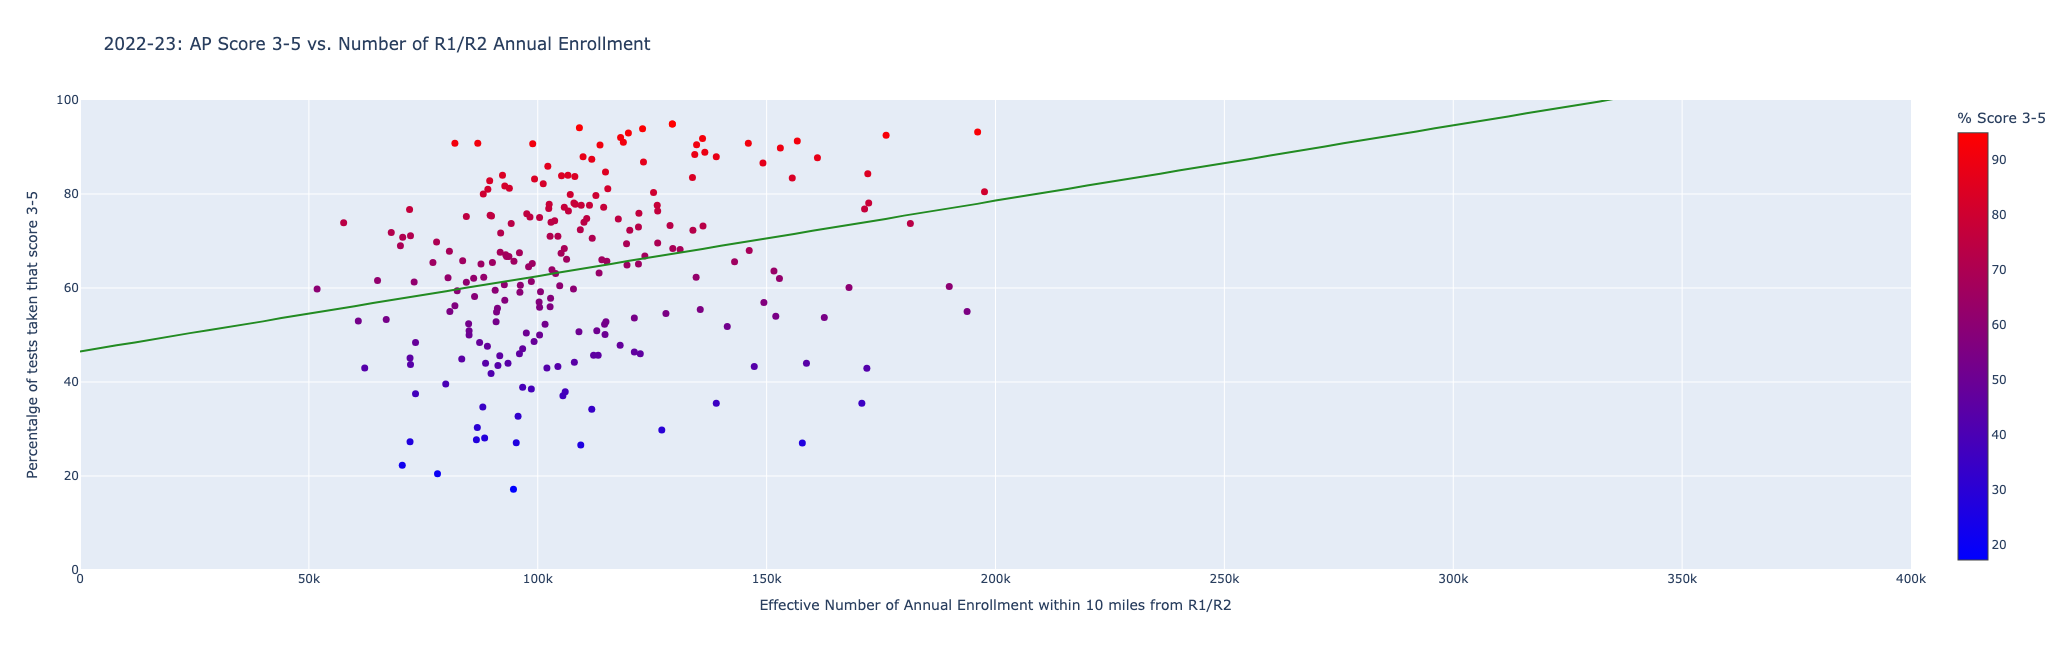

In [10]:
x_arr = MA_AP_all_data['Enrollment Inverse Distance R1R2'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 400e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of R1/R2 Annual Enrollment ',
                  xaxis_title='Effective Number of Annual Enrollment within 10 miles from R1/R2',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 4e5])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_enrollment_R1R2_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Public Universities

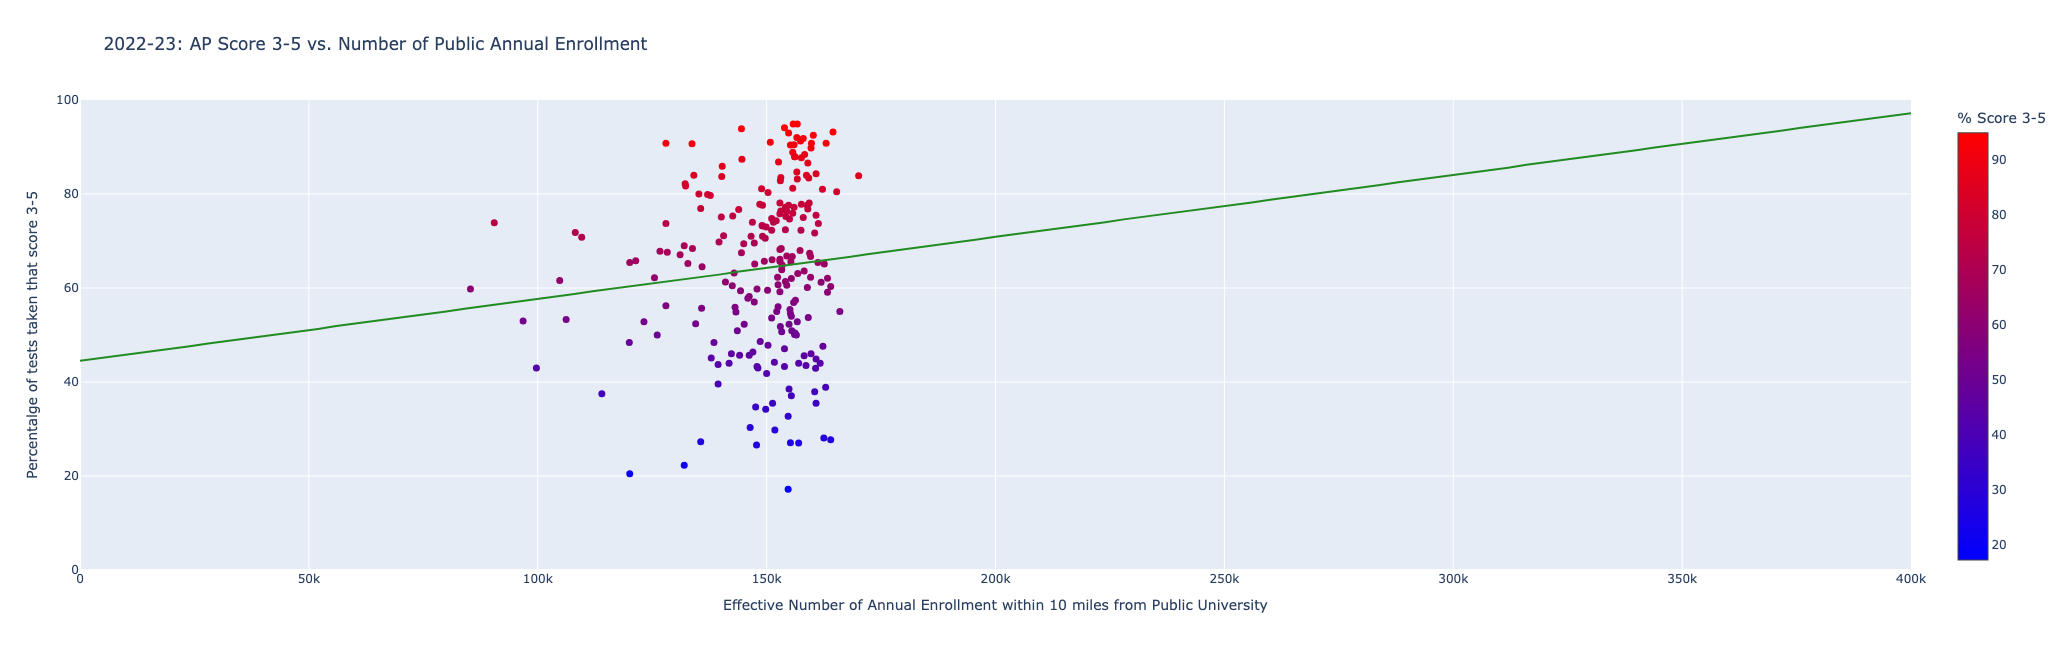

In [11]:
x_arr = MA_AP_all_data['Enrollment Inverse Distance Public'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 400e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Public Annual Enrollment ',
                  xaxis_title='Effective Number of Annual Enrollment within 10 miles from Public University',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 4e5])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_enrollment_Public_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Private not-for-profit Universities

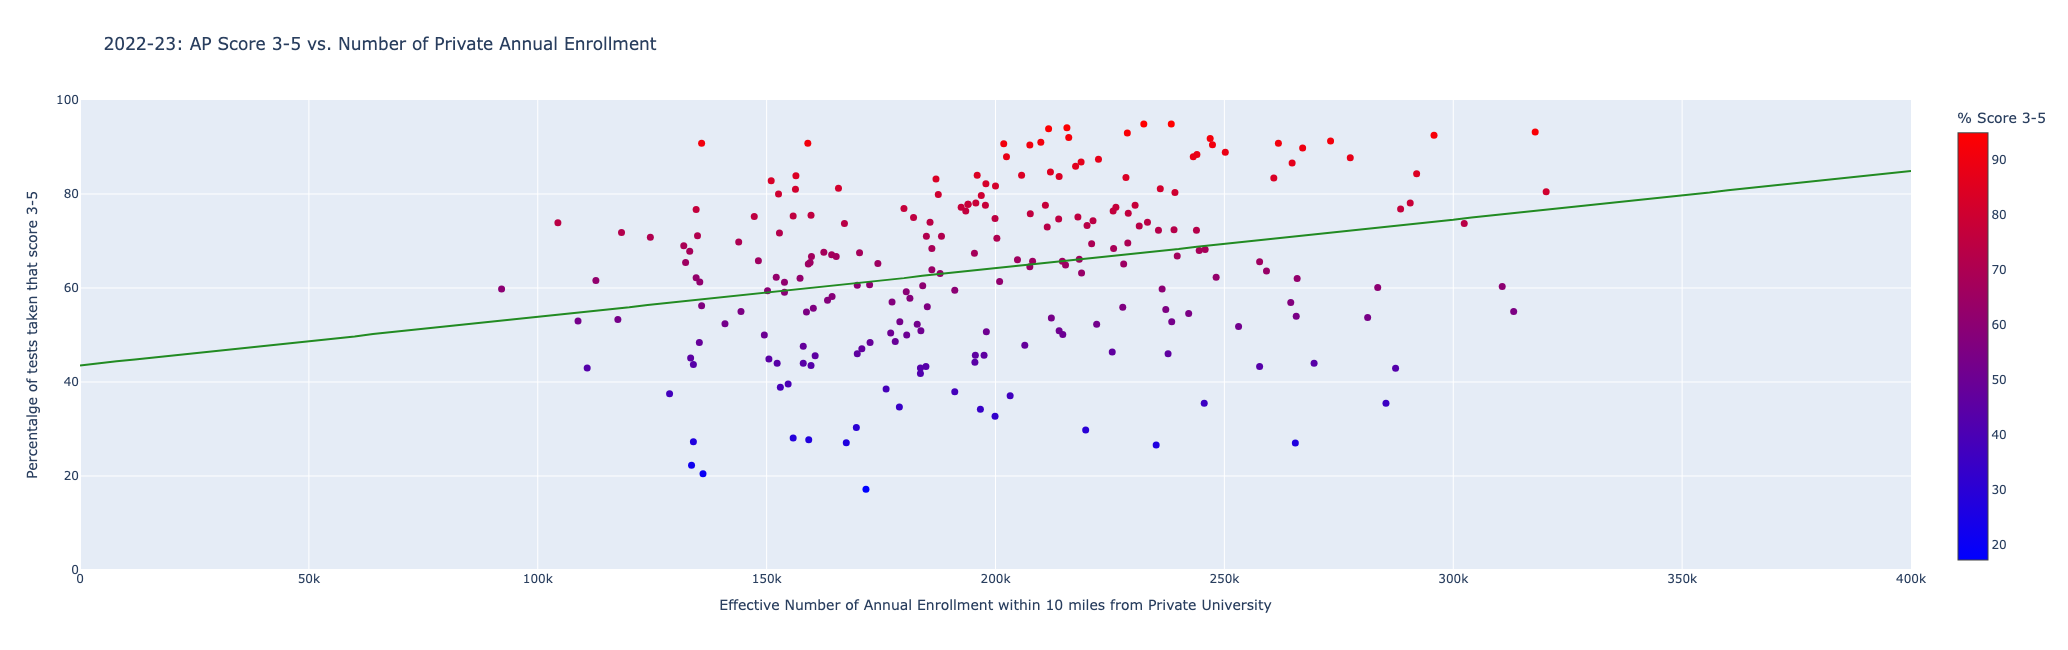

In [12]:
x_arr = MA_AP_all_data['Enrollment Inverse Distance Private nfp'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 400e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Private Annual Enrollment ',
                  xaxis_title='Effective Number of Annual Enrollment within 10 miles from Private University',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 4e5])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_enrollment_private_nfp_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Land Grant Universities

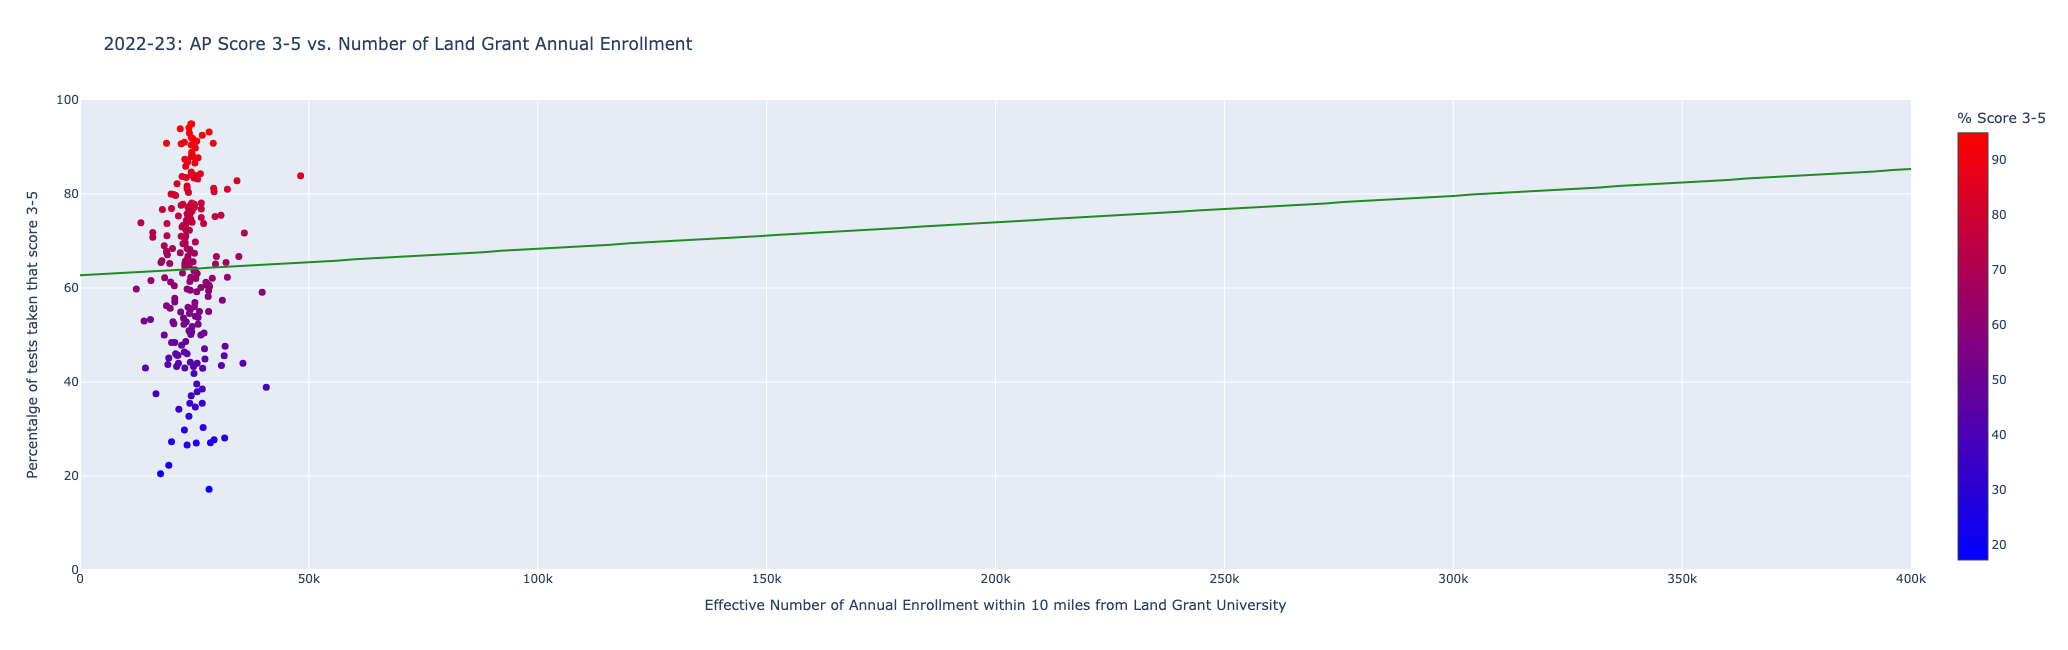

In [13]:
x_arr = MA_AP_all_data['Enrollment Inverse Distance Land Grant'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 400e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Land Grant Annual Enrollment ',
                  xaxis_title='Effective Number of Annual Enrollment within 10 miles from Land Grant University',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 4e5])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_enrollment_land_grant_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to STEM Universities

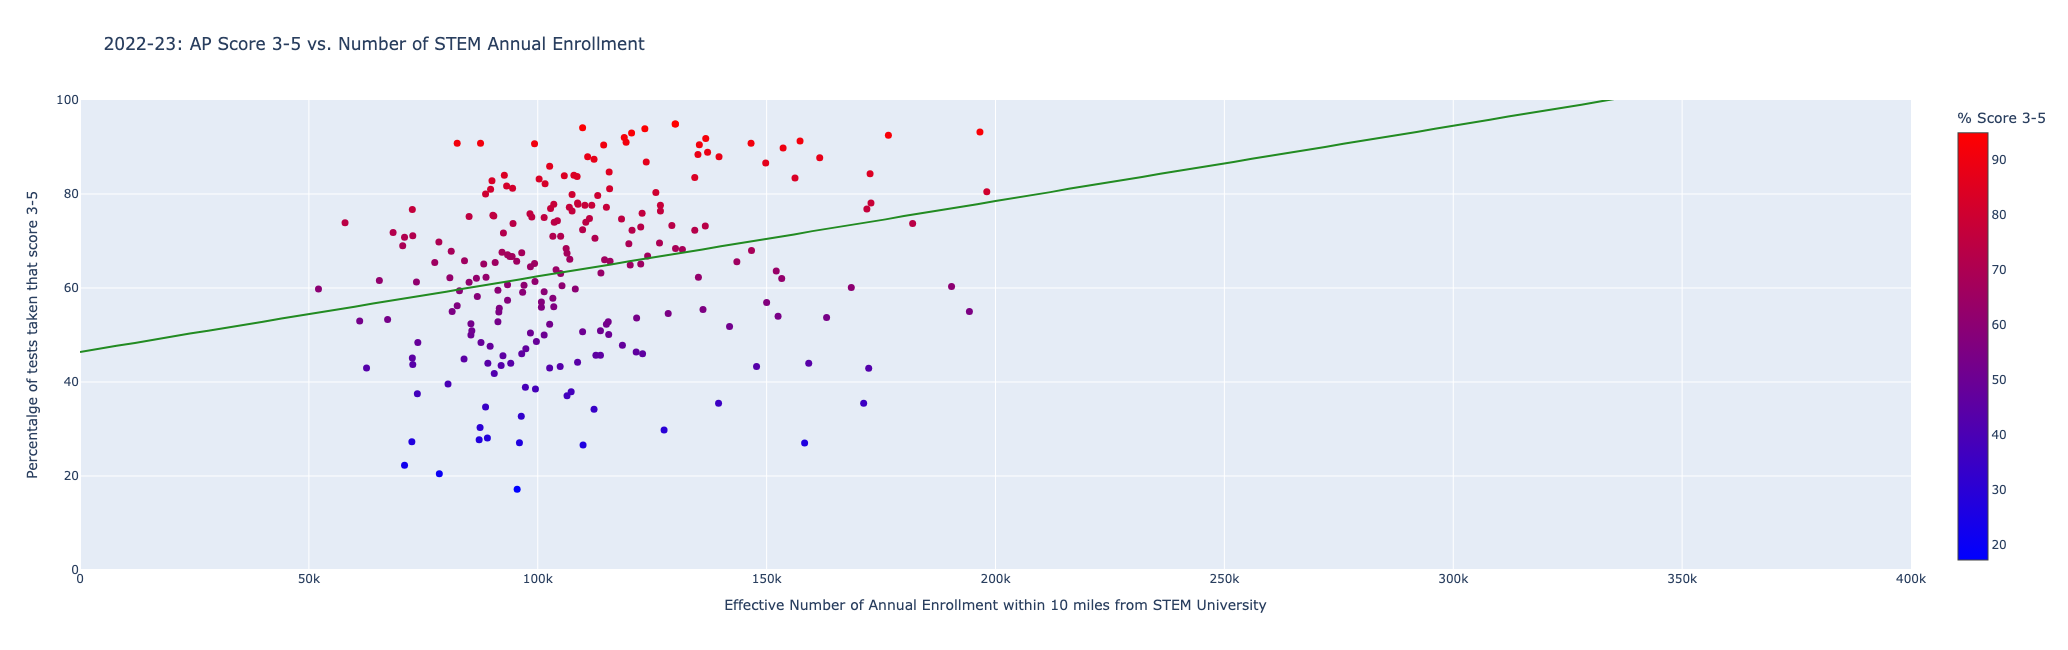

In [14]:
x_arr = MA_AP_all_data['Enrollment Inverse Distance STEM'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 400e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of STEM Annual Enrollment ',
                  xaxis_title='Effective Number of Annual Enrollment within 10 miles from STEM University',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 4e5])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_enrollment_STEM_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Number of Dorm Beds $\times$ Inverse Distance = Effective Number of Dorm Beds within 10 miles

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to R1/R2 Universities

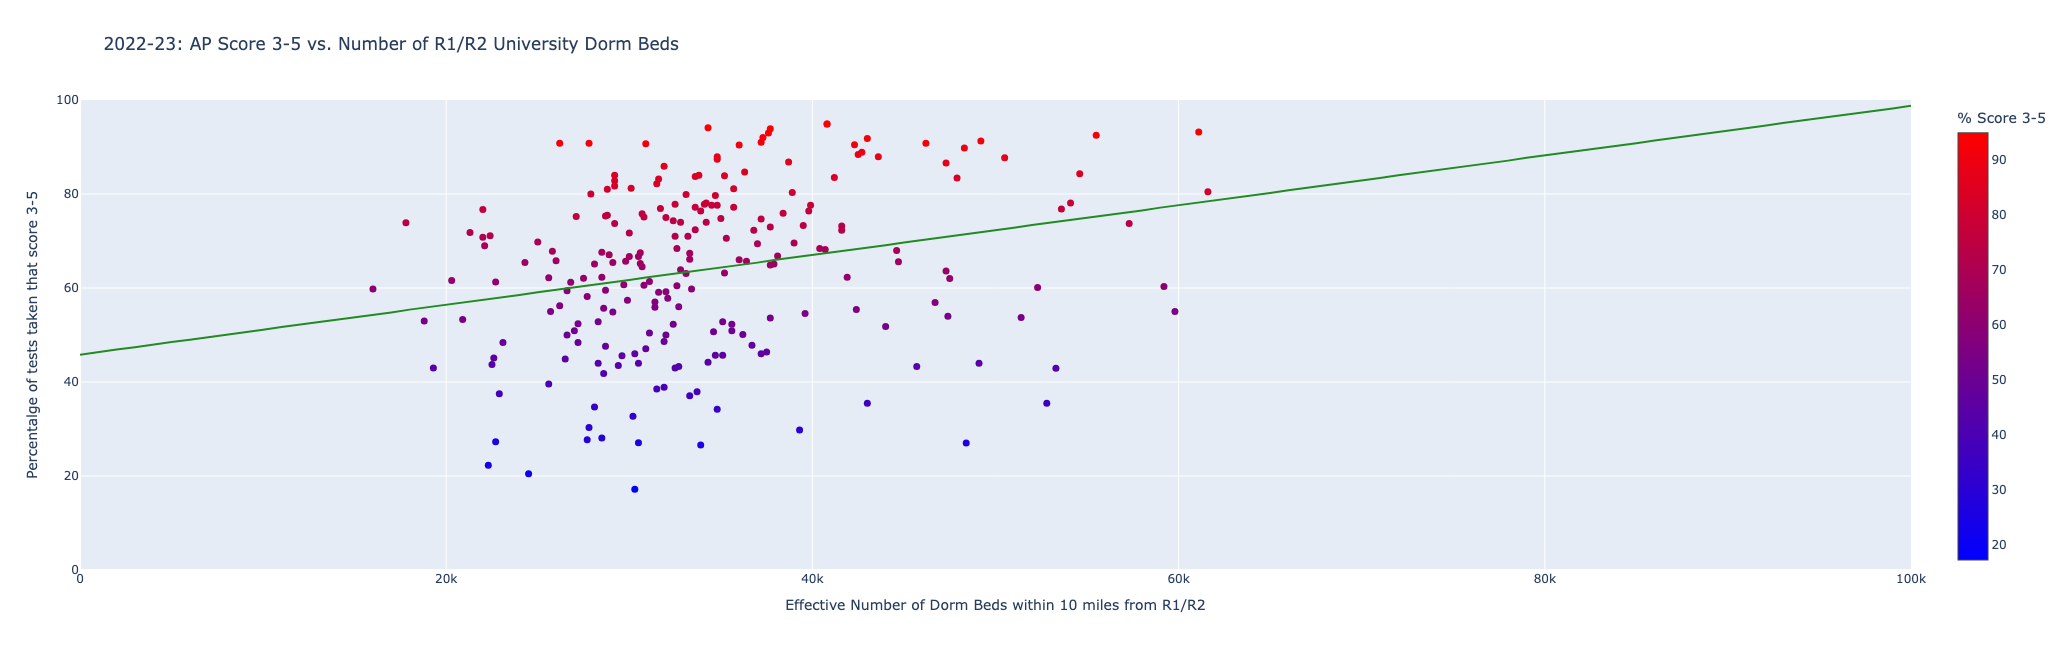

In [15]:
x_arr = MA_AP_all_data['Dorm Bed Inverse Distance R1R2'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 100e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of R1/R2 University Dorm Beds',
                  xaxis_title='Effective Number of Dorm Beds within 10 miles from R1/R2',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0, 100e3])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_dorm_bed_R1R2_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Public Universities

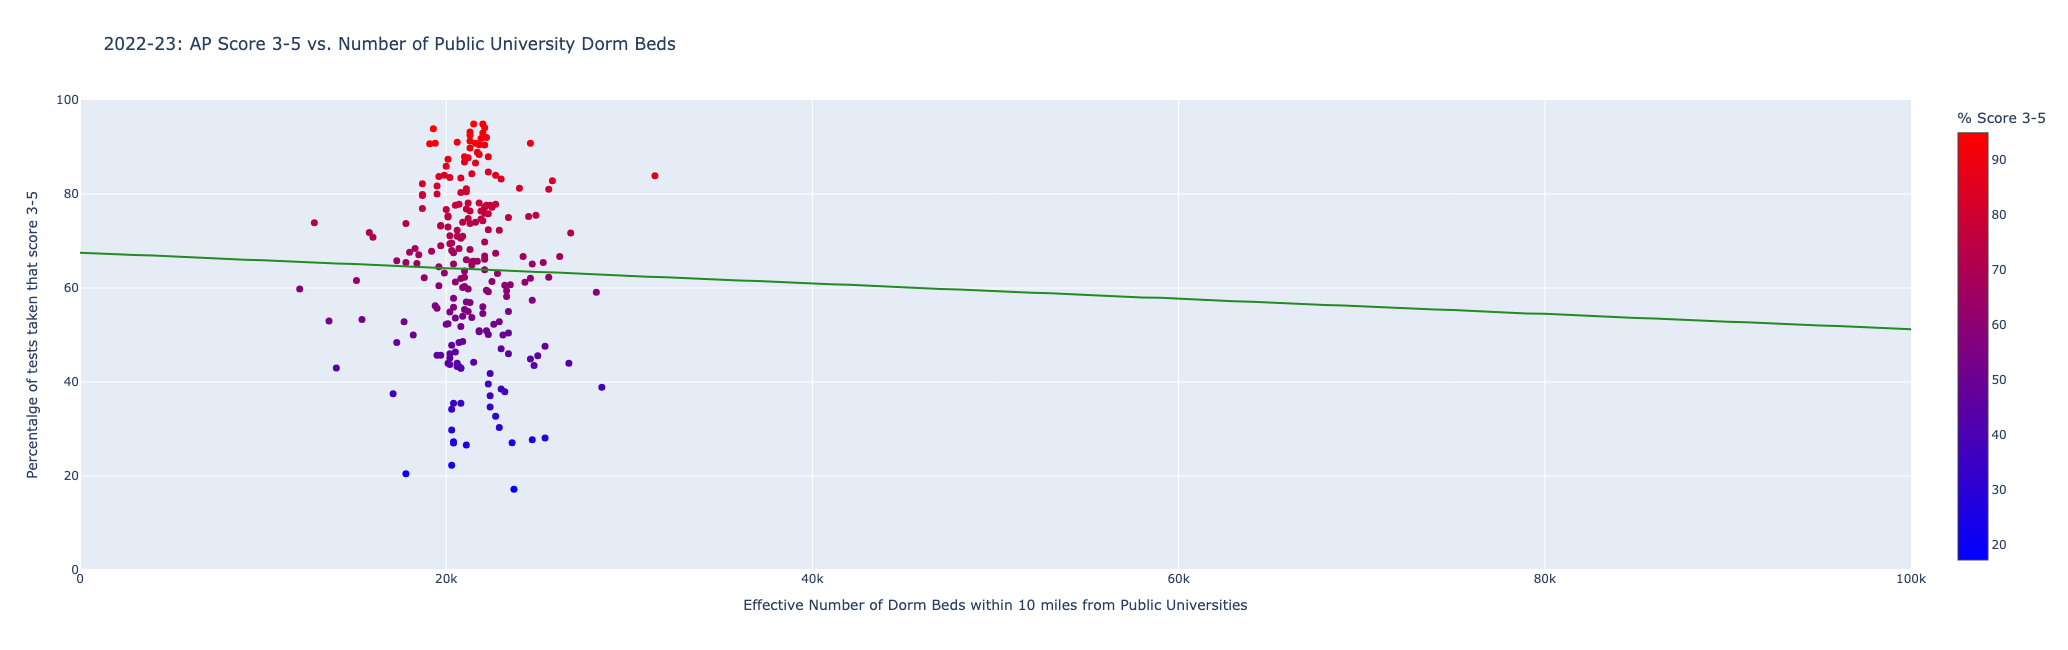

In [16]:
x_arr = MA_AP_all_data['Dorm Bed Inverse Distance Public'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 100e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Public University Dorm Beds',
                  xaxis_title='Effective Number of Dorm Beds within 10 miles from Public Universities',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0, 100e3])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_dorm_bed_public_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Private Universities

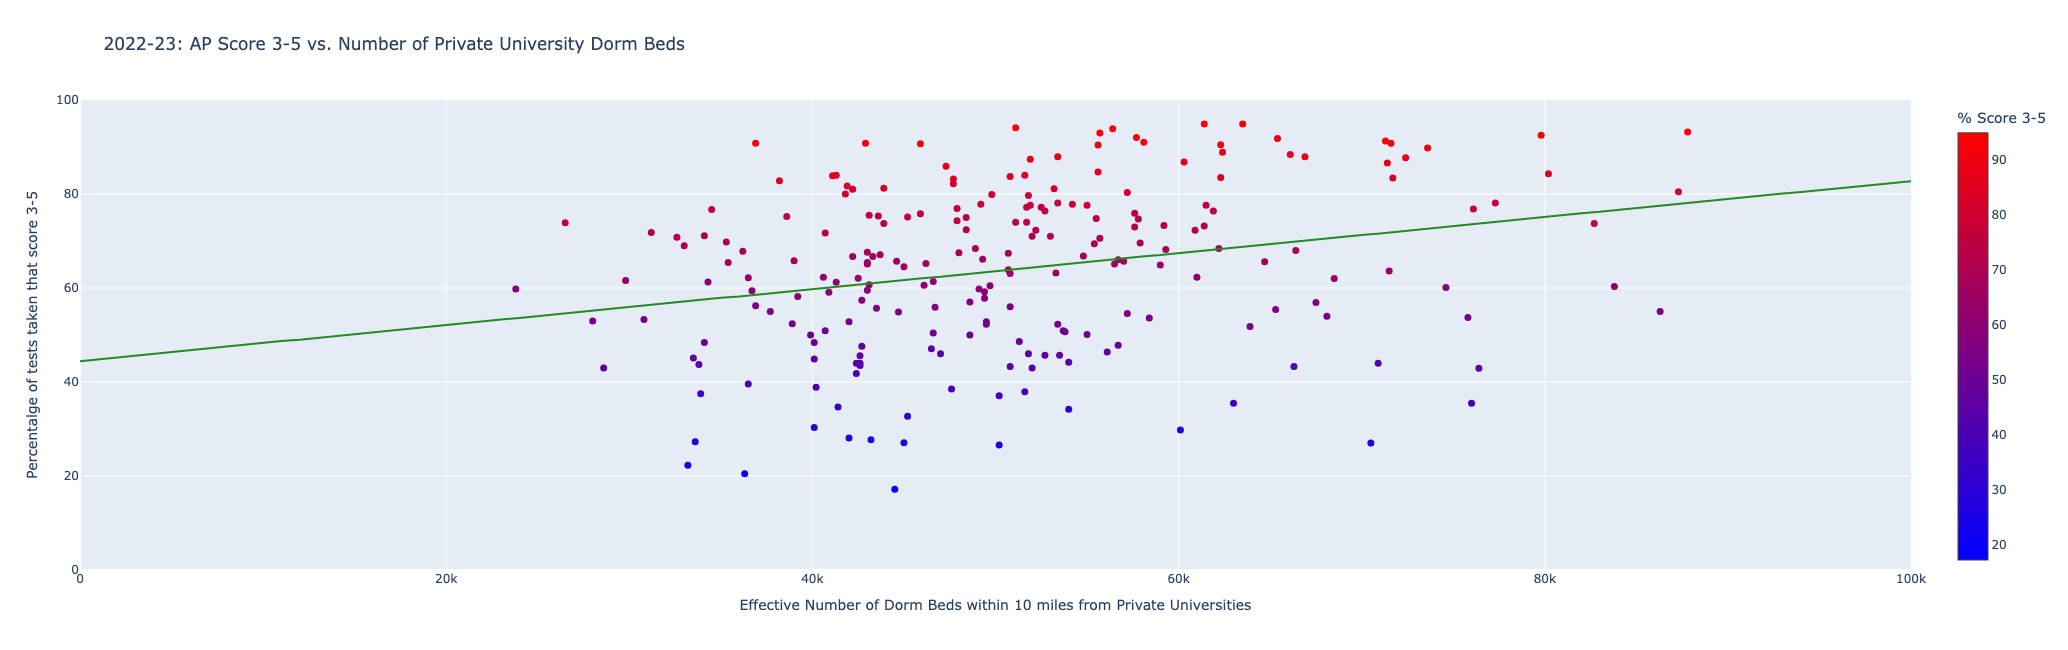

In [17]:
x_arr = MA_AP_all_data['Dorm Bed Inverse Distance Private nfp'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 100e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Private University Dorm Beds',
                  xaxis_title='Effective Number of Dorm Beds within 10 miles from Private Universities',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0, 100e3])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_dorm_bed_private_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to Land Grant Universities

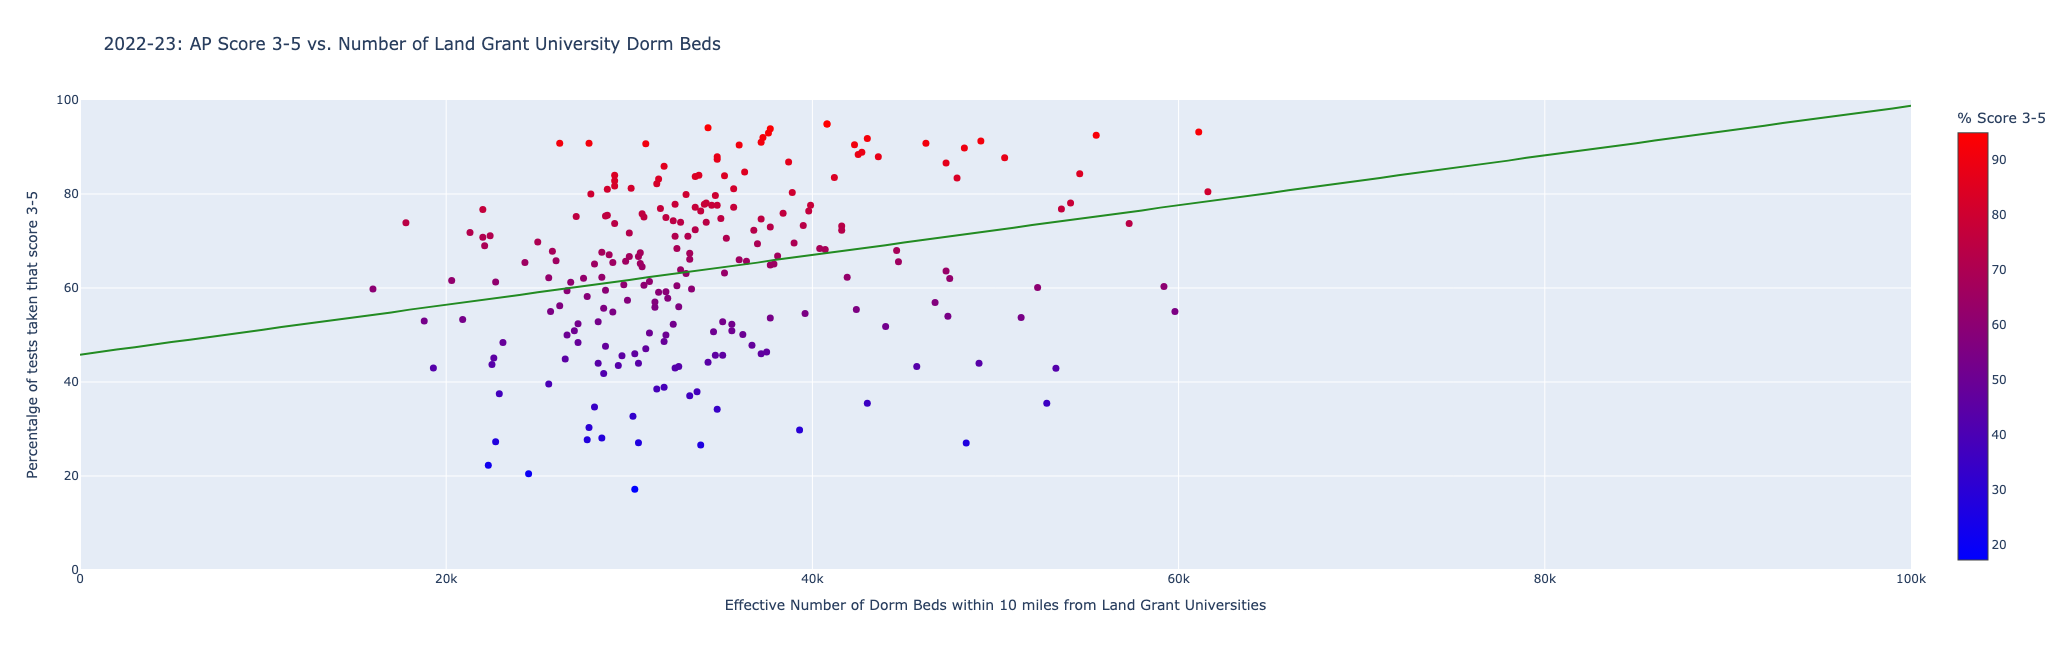

In [18]:
x_arr = MA_AP_all_data['Dorm Bed Inverse Distance R1R2'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 100e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of Land Grant University Dorm Beds',
                  xaxis_title='Effective Number of Dorm Beds within 10 miles from Land Grant Universities',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0, 100e3])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_dorm_bed_land_grant_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)

### 2022-23: AP Score 3-5 vs. Number of Annula Enrollment $\times$ Inverse Distance to STEM Universities

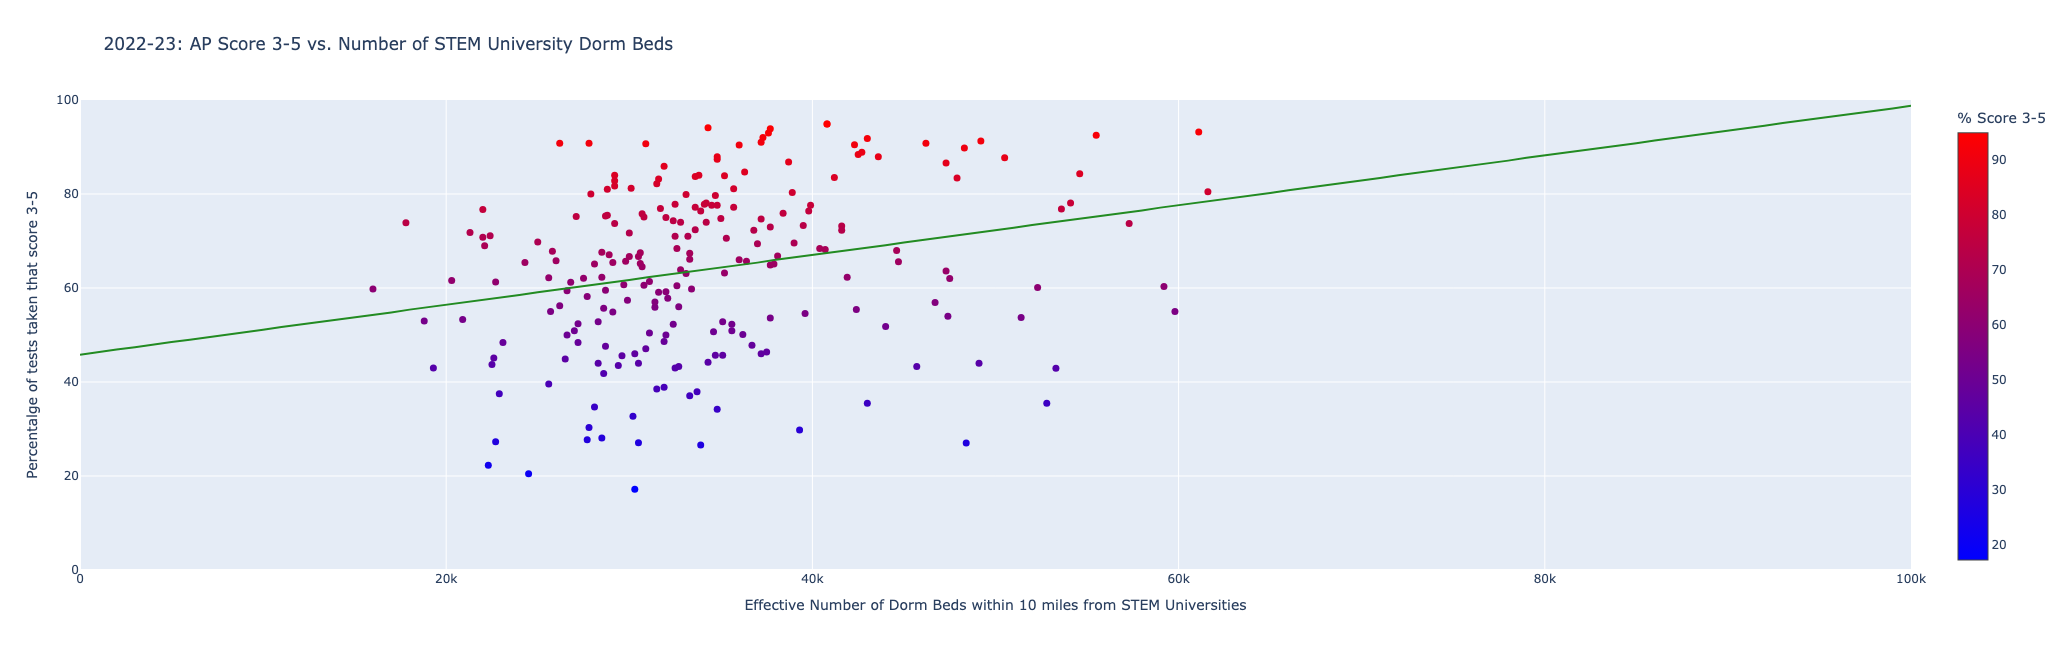

In [19]:
x_arr = MA_AP_all_data['Dorm Bed Inverse Distance R1R2'].to_numpy()
y_arr = MA_AP_all_data['% Score 3-5'].to_numpy()

model = LinearRegression()
model.fit(x_arr.reshape(-1,1), y_arr)

#### draw the data points ####
fig = go.Figure(data=go.Scatter(x=np.round(x_arr, decimals = -2),
                                y=np.round(y_arr, decimals = 1),
                                mode='markers',
                                marker=dict(
                                    size=7,
                                    color=y_arr,
                                    colorscale='Bluered',
                                    symbol='circle',
                                    showscale=True,
                                    colorbar=dict(title='% Score 3-5'),
                                ),
                                showlegend=False,
                                text=MA_AP_all_data['District Name'],
                                name='')) 

# Draw the linear fitted line without showing it in the legend
x_line = np.linspace(0, 100e3, 101)
x_line = np.round(x_line, decimals = -2)
y_line = model.predict(x_line.reshape(-1, 1))
y_line = np.round(y_line, decimals = 1)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen"),
    name="Fitted Line",
    showlegend=False  # This hides the line from the legend
))

#### write the title of the plot ####
fig.update_layout(title='2022-23: AP Score 3-5 vs. Number of STEM University Dorm Beds',
                  xaxis_title='Effective Number of Dorm Beds within 10 miles from STEM Universities',
                  yaxis_title='Percentalge of tests taken that score 3-5',
                  width=650,
                  height=650)

fig.update_xaxes(range=[0e5, 100e3])
fig.update_yaxes(range=[0, 100])
fig.show()

with open('data/MA_pickled/MA_pass_vs_dorm_bed_STEM_inverse_distance.pkl', 'wb') as f:
    pickle.dump(fig, f)